#### CNN을 이용한 MNIST 손글씨 숫자 분류 2020/01/20
##### CNN은 합성곱 레이어(Convolution Layer)와 풀링 레이어(Pooling Layer)로 구성된 신경망 입니다.


##### 이미지 데이터를 분석할 때 높은 정답률을 내고 음성인식, 얼굴인식, 추천 시스템, 번역 등 다양한 용도로 사용


In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [4]:
# 입력과 출력 지정하기
im_rows = 28 # 이미지 세로 픽셀 크기
im_cols = 28 # 이미지 가로 픽셀 크기
im_color = 1 # 이미지의 색공간 / 그레이스케일
in_shape = (im_rows, im_cols, im_colors) 
out_size = 10

In [5]:
# MNIST 데이터 읽어 들이기
(X_train,y_train),(X_test,y_test) = mnist.load_data()

# 읽어들인 데이터를 3차원 배열로 변환하기
X_train = X_train.reshape(-1, im_rows, im_cols, im_color)
X_train = X_train.astype('float32') / 255
X_test = X_test.reshape(-1, im_rows, im_cols, im_color)
X_test = X_test.astype('float32') / 255

# 레이블 데이터를 One-hot 형식으로 변환하기
y_train = keras.utils.np_utils.to_categorical(y_train.astype('int32'),10)
y_test = keras.utils.np_utils.to_categorical(y_test.astype('int32'),10)


In [6]:
# CNN 모델 구조 정의하기
model = Sequential()
model.add(Conv2D(32,
                kernel_size=(3,3),
                activation='relu',
                input_shape=in_shape))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(out_size, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
# 모델 컴파일하기
model.compile(
    loss= 'categorical_crossentropy',
    optimizer=RMSprop(),
    metrics=['accuracy'])

In [8]:
# 학습하기
hist = model.fit(X_train,y_train,
                batch_size=128,
                epochs=12,
                verbose=1,
                validation_data=(X_test,y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 69s 1ms/step - loss: 0.2240 - accuracy: 0.9318 - val_loss: 0.0681 - val_accuracy: 0.9779
Epoch 2/12
60000/60000 [==============================] - 68s 1ms/step - loss: 0.0831 - accuracy: 0.9754 - val_loss: 0.0463 - val_accuracy: 0.9856
Epoch 3/12
60000/60000 [==============================] - 68s 1ms/step - loss: 0.0616 - accuracy: 0.9818 - val_loss: 0.0373 - val_accuracy: 0.9871
Epoch 4/12
60000/60000 [==============================] - 68s 1ms/step - loss: 0.0530 - accuracy: 0.9850 - val_loss: 0.0514 - val_accuracy: 0.9839
Epoch 5/12
60000/60000 [==============================] - 67s 1ms/step - loss: 0.0504 - accuracy: 0.9856 - val_loss: 0.0336 - val_accuracy: 0.9895
Epoch 6/12
60000/60000 [==============================] - 68s 1ms/step - loss: 0.0514 - accuracy: 0.9861 - val_loss: 0.0320 - val_accuracy: 0.9894
Epoch 7/12
60000/600

In [11]:
# 모델 평가하기 
score = model.evaluate(X_test,y_test,verbose=1)
print('정답률 =', score[1], 'loss=', score[0])

10000/10000 [==============================] - 4s 428us/step
정답률 = 0.989799976348877 loss= 0.04187503308993464


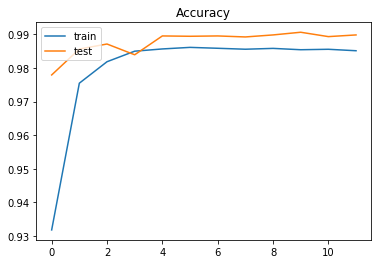

In [14]:
# 학습 상태를 그래프로 그리기
# 정답률 추이를 그래프로 그리기
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train','test'], loc= 'upper left')
plt.show()

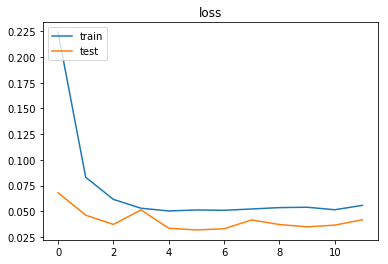

In [15]:
# 손실 추이를 그래프로 그리기
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('loss')
plt.legend(['train','test'], loc= 'upper left')
plt.show()